In [53]:
import Qchains
import matplotlib.pyplot as plt

# Stars

In [54]:
import numpy as np
import plotly.graph_objects as go

def StarGenerator(n_points, showStructure=False):
    if n_points < 3:
        raise ValueError("Polygon must have at least 3 points.")

    # Step 1: Regular polygon on unit circle
    angles = np.linspace(0, 2 * np.pi, n_points, endpoint=False)
    x = np.cos(angles)
    y = np.sin(angles)
    points = np.stack((x, y), axis=-1)
    
    # Scale so edge length = 1
    side_length = np.linalg.norm(points[0] - points[1])
    scale = 1.0 / side_length
    points *= scale
    points_3d = np.hstack((points, np.zeros((n_points, 1))))

    # Step 2: Add triangle peaks
    triangle_peaks = []
    for i in range(n_points):
        p1 = points_3d[i]
        p2 = points_3d[(i + 1) % n_points]  # wrap around

        # Midpoint of edge
        mid = 0.5 * (p1 + p2)

        # Direction of edge
        edge_vec = p2 - p1
        edge_vec /= np.linalg.norm(edge_vec)

        # Perpendicular direction (normal to the polygon plane)
        normal_vec = np.array([0, 0, 1])  # z-direction
        outward_dir = np.cross(edge_vec, normal_vec)
        outward_dir /= np.linalg.norm(outward_dir)

        # Height of isosceles triangle from base to tip:
        # For base length b and legs L:
        # height h = sqrt(L^2 - (b/2)^2)
        b = np.linalg.norm(p2 - p1)
        L = 1.0  # desired leg length
        h = np.sqrt(L**2 - (b / 2)**2)

        # Triangle peak position
        peak = mid + h * outward_dir
        triangle_peaks.append(peak)

    triangle_peaks = np.array(triangle_peaks)

    all_points = np.vstack((points_3d, triangle_peaks))


    if showStructure:
        fig = go.Figure()

        # Original base points (orange)
      # Close the ring loop
        ring_closed = np.vstack([points_3d, points_3d[0:1]])

        fig.add_trace(go.Scatter3d(
            x=ring_closed[:, 0], y=ring_closed[:, 1], z=ring_closed[:, 2],
            mode='markers+lines',
            marker=dict(size=5, color='orange'),
            line=dict(color='orange'),
            name='Ring vertices'
        ))

        # Close the triangle peak loop
        peaks_closed = np.vstack([triangle_peaks, triangle_peaks[0:1]])

        fig.add_trace(go.Scatter3d(
            x=peaks_closed[:, 0], y=peaks_closed[:, 1], z=peaks_closed[:, 2],
            mode='markers+lines',
            marker=dict(size=5, color='green'),
            line=dict(color='green'),
            name='Triangle peaks'
        ))

        fig.update_layout(
            title="Star Polygon Structure",
            scene=dict(xaxis_title="X", yaxis_title="Y", zaxis_title="Z"),
            margin=dict(l=0, r=0, b=0, t=40)
        )
        fig.show()

    return all_points


In [55]:
star_points = StarGenerator(8, True)

In [56]:
np.linalg.norm(star_points[4] - star_points[9])

2.8422026709086228

In [57]:
star_points[0]

array([1.30656296, 0.        , 0.        ])

In [58]:
import numpy as np
import plotly.graph_objects as go

def StarGenerator2(n_points, showStructure=False):
    if n_points < 3:
        raise ValueError("Polygon must have at least 3 points.")

    # Step 1: Regular polygon on unit circle
    angles = np.linspace(0, 2 * np.pi, n_points, endpoint=False)
    x = np.cos(angles)
    y = np.sin(angles)
    points = np.stack((x, y), axis=-1)
    
    # Scale so edge length = 1
    side_length = np.linalg.norm(points[0] - points[1])
    scale = 1.0 / side_length
    points *= scale
    points_3d = np.hstack((points, np.zeros((n_points, 1))))

    # Step 2: Add triangle peaks
    triangle_peaks = []
    for i in range(n_points):
        p1 = points_3d[i]
        p2 = points_3d[(i + 1) % n_points]  # wrap around

        # Midpoint of edge
        mid = 0.5 * (p1 + p2)

        # Direction of edge
        edge_vec = p2 - p1
        edge_vec /= np.linalg.norm(edge_vec)

        # Perpendicular direction (normal to the polygon plane)
        normal_vec = np.array([0, 0, 1])  # z-direction
        outward_dir = np.cross(edge_vec, normal_vec)
        outward_dir /= np.linalg.norm(outward_dir)

        # Height of isosceles triangle from base to tip:
        # For base length b and legs L:
        # height h = sqrt(L^2 - (b/2)^2)
        b = np.linalg.norm(p2 - p1)
        L = 1.0  # desired leg length
        h = np.sqrt(L**2 - (b / 2)**2)

        # Triangle peak position
        peak = mid + h * outward_dir
        triangle_peaks.append(peak)

    triangle_peaks = np.array(triangle_peaks)

    all_points = np.vstack((points_3d, triangle_peaks))


    if showStructure:
        fig = go.Figure()

        # Original base points (orange)
      # Close the ring loop
        ring_closed = np.vstack([points_3d, points_3d[0:1]])

        # Connect each peak to its base pair
        for i in range(n_points):
            peak = triangle_peaks[i]
            base1 = points_3d[i]
            base2 = points_3d[(i + 1) % n_points]

            for base in [base1, base2]:
                fig.add_trace(go.Scatter3d(
                    x=[base[0], peak[0]],
                    y=[base[1], peak[1]],
                    z=[base[2], peak[2]],
                    mode='lines',
                    line=dict(color='black', width=2),
                    showlegend=False
                ))


        fig.add_trace(go.Scatter3d(
            x=ring_closed[:, 0], y=ring_closed[:, 1], z=ring_closed[:, 2],
            mode='markers',
            marker=dict(size=5, color='orange'),
            #line=dict(color='orange'),
            name='Ring vertices'
        ))

        # Close the triangle peak loop
        peaks_closed = np.vstack([triangle_peaks, triangle_peaks[0:1]])

        fig.add_trace(go.Scatter3d(
            x=peaks_closed[:, 0], y=peaks_closed[:, 1], z=peaks_closed[:, 2],
            mode='markers',
            marker=dict(size=5, color='green'),
            #line=dict(color='green'),
            name='Triangle peaks'
        ))

        fig.update_layout(
            title="Star Polygon Structure",
            scene=dict(xaxis_title="X", yaxis_title="Y", zaxis_title="Z"),
            margin=dict(l=0, r=0, b=0, t=40)
        )
        fig.show()

    return all_points


In [59]:
half_N = 8
star2_points = StarGenerator2(half_N, True)

In [60]:
test_indx = 4
np.linalg.norm(star2_points[test_indx] - star2_points[test_indx + half_N])

1.0

In [61]:
subradiant_star_list = []

dipole_vector_z_hat = np.array([0, 0, 1]) #in z direction 
dipole_vector_x_hat = np.array([1, 0, 0]) #in x direction 

d_star = 0.3


N_half_star = np.arange(3, 51, 1)  #start from 3 since polygon must have 3 points

for n in N_half_star:
    star = StarGenerator(n)
    star_eigval, star_eigvec = Qchains.FindEigenstates(star, dipole_vector_z_hat, d_star)
    star_most_subradiant_decay_rate = - np.max(2 * star_eigval.real)
    subradiant_star_list.append(star_most_subradiant_decay_rate)

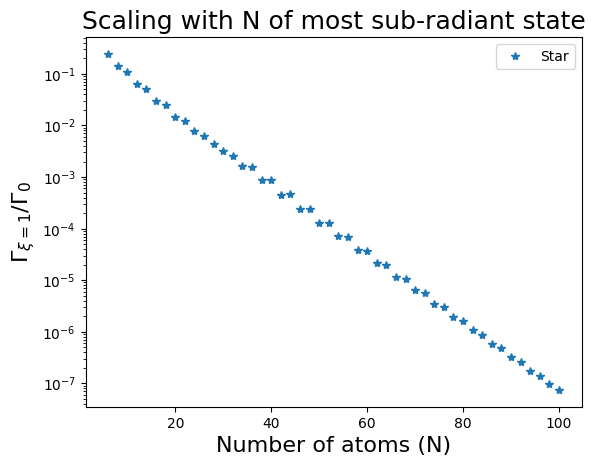

In [62]:
plt.plot(N_half_star * 2, subradiant_star_list, '*', label = 'Star' ) #times 2 to get N. 
#plt.plot(N_ring, subradiant_inverted_hedgehog_list, '.', label = 'Inverted hedgehog')
plt.yscale('log')
plt.title('Scaling with N of most sub-radiant state', fontsize = 18)
plt.ylabel(r'$\Gamma_{\xi = 1} / \Gamma_0$', fontsize = 16)
plt.xlabel('Number of atoms (N)', fontsize = 16)
plt.legend();

In [63]:
N_half_star

array([ 3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19,
       20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36,
       37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50])

In [64]:
N_half_star * 2

array([  6,   8,  10,  12,  14,  16,  18,  20,  22,  24,  26,  28,  30,
        32,  34,  36,  38,  40,  42,  44,  46,  48,  50,  52,  54,  56,
        58,  60,  62,  64,  66,  68,  70,  72,  74,  76,  78,  80,  82,
        84,  86,  88,  90,  92,  94,  96,  98, 100])

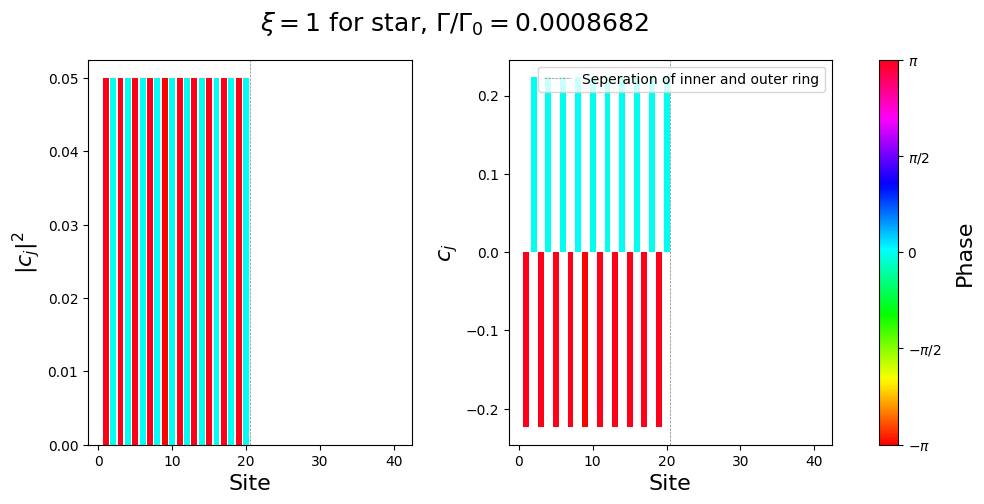

In [65]:
star_20 = StarGenerator(20) 
star_eigval_20, star_eigvec_20 = Qchains.FindEigenstates(star_20, dipole_vector_z_hat, d_star)
Qchains.SiteProbAndAmplitudeDistribution(star_eigval_20, star_eigvec_20, state_num=0, titleprecision=7, sharey=False, is_star=True)

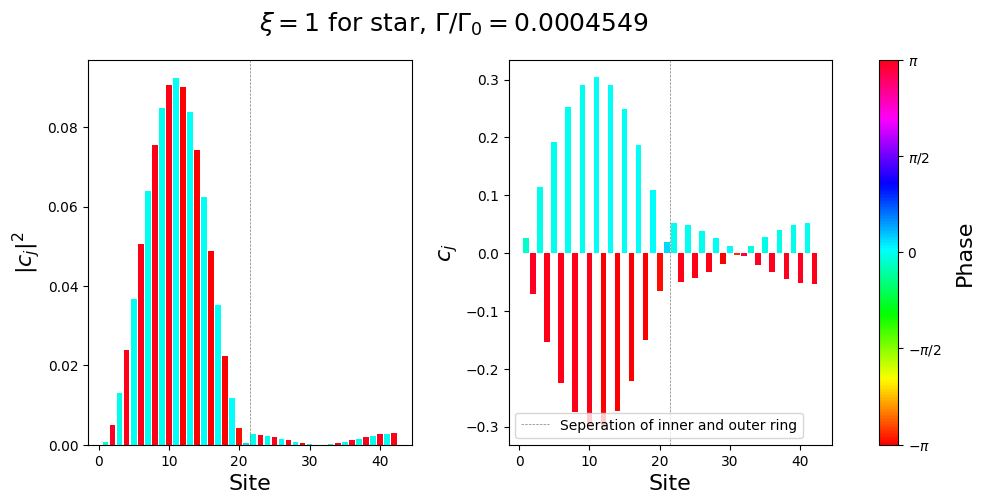

In [66]:
star_20 = StarGenerator(21) 
star_eigval_20, star_eigvec_20 = Qchains.FindEigenstates(star_20, dipole_vector_z_hat, d_star)
Qchains.SiteProbAndAmplitudeDistribution(star_eigval_20, star_eigvec_20, state_num=0, titleprecision=7, sharey=False, is_star=True)

For N = 40 (and greater values in incremeants of 2) we see commplete decoupling. The fact that it has to be incremeants of 2 is so the phase completely changes from start to end of the inner ring. I.e starts red ends blue or vice verca. This complete decoupling means it acts ass a simple z-polarized ring, but the atom number is twice at large since the outer ring is just there. Thus it is simply act as the the z-polarized ring but obviously scaling slower. 
For odd numbers of the inner ring it still decouples very strongly. 

In [67]:
subradiant_star_list = []
subradiant_star_hedgehog_list = []

dipole_vector_z_hat = np.array([0, 0, 1]) #in z direction 
dipole_vector_x_hat = np.array([1, 0, 0]) #in x direction 

d_star = 0.3


N_half_star = np.arange(3, 51, 1)  #start from 3 since polygon must have 3 points

for n in N_half_star:
    star = StarGenerator(n)
    star_eigval, star_eigvec = Qchains.FindEigenstates(star, dipole_vector_z_hat, d_star)
    star_most_subradiant_decay_rate = - np.max(2 * star_eigval.real)
    subradiant_star_list.append(star_most_subradiant_decay_rate)

for n in N_half_star:
    star_hedgehog = Qchains.StarGenerator(n)
    magnitudes_n = np.linalg.norm(star_hedgehog, axis=1, keepdims=True) 
    unit_polarization_n = star_hedgehog / magnitudes_n

    star_hedgehog_eigval_n, star_hedgehog_eigved_n = Qchains.EigenstatesHedgehog(star_hedgehog, unit_polarization_n, d_star)
    star_hedgehog_most_subradiant_decay_rate = - np.max(2 * star_hedgehog_eigval_n.real)
    subradiant_star_hedgehog_list.append(star_hedgehog_most_subradiant_decay_rate)

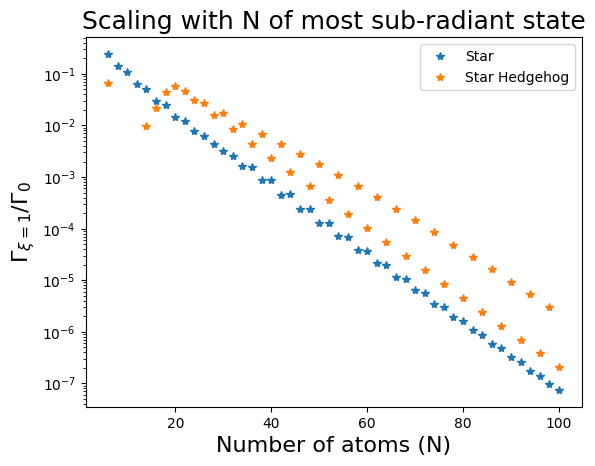

In [68]:
plt.plot(N_half_star * 2, subradiant_star_list, '*', label = 'Star' ) #times 2 to get N. 
plt.plot(N_half_star * 2, subradiant_star_hedgehog_list, '*', label = 'Star Hedgehog')
#plt.plot(N_ring, subradiant_inverted_hedgehog_list, '.', label = 'Inverted hedgehog')
plt.yscale('log')
plt.title('Scaling with N of most sub-radiant state', fontsize = 18)
plt.ylabel(r'$\Gamma_{\xi = 1} / \Gamma_0$', fontsize = 16)
plt.xlabel('Number of atoms (N)', fontsize = 16)
plt.legend();

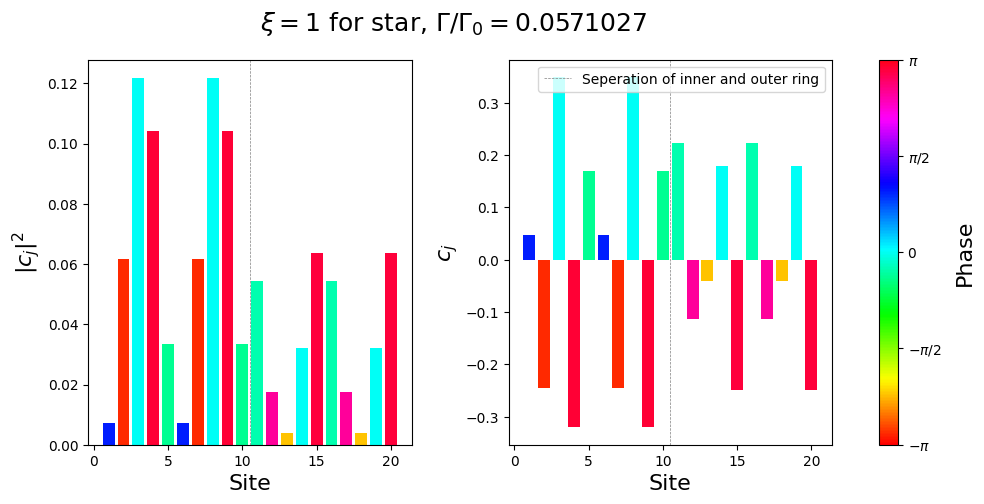

In [69]:
star_hedgehog = Qchains.StarGenerator(10)
magnitudes_n = np.linalg.norm(star_hedgehog, axis=1, keepdims=True) 
unit_polarization_n = star_hedgehog / magnitudes_n
star_hedgehog_eigval_n, star_hedgehog_eigved_n = Qchains.EigenstatesHedgehog(star_hedgehog, unit_polarization_n, d_star)
Qchains.SiteProbAndAmplitudeDistribution(star_hedgehog_eigval_n, star_hedgehog_eigved_n, state_num=0, titleprecision=7, sharey=False, is_star=True)
